# GUC K-nearest neighbor Classification

#### student name: May Yousry Mohamed
#### student ID: 43-15583

### Import packages and data set
#### Import the "Classified data" file 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\KNN_assignment\Classified Data')
df

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [3]:
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [4]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [5]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [6]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [8]:


print("the algorithm accuracy is " ,100*accuracy_score(y_test,pred), "%")
print("the algorithm f1_score is " ,f1_score(y_test,pred))


the algorithm accuracy is  91.2 %
the algorithm f1_score is  0.9105691056910571


* the algorithm accuracy is  91.2 %
* the algorithm f1_score is  0.9105691056910571

[[232  18]
 [ 26 224]]


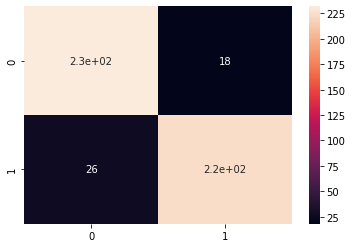

In [9]:

confusion_matrix = confusion_matrix(y_test, pred)
sns.heatmap(confusion_matrix,annot=True)
print(confusion_matrix)


## from the confusion matrix, 232 were correctly assigned to class 1 and 224 were correctly assigned to class 2. the 18 and 26 are the incorrectly  assigned data points.

In [10]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       250
           1       0.93      0.90      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



***Print Misclassification error rate***

In [11]:

cv_scores = cross_val_score(knn, X_train,y_train)
print(cv_scores)

print('cv_scores mean:{}'.format(np.mean(cv_scores)))


[0.85 0.85 0.94 0.91 0.96]
cv_scores mean:0.9019999999999999


In [12]:
np.mean(pred != y_test)

0.088

* misclassification error rate = 0.088

# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

###### using K-fold cross validation

The optimal number of neighbors is 13


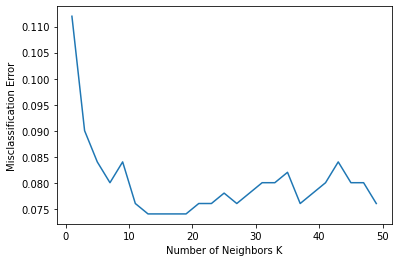

In [13]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='accuracy')
    cv_scores.append(scores.mean())
   
 
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [14]:
knn13 = KNeighborsClassifier(n_neighbors=13)
knn13.fit(X_train,y_train)
pred13 = knn13.predict(X_test)

print("the algorithm accuracy is " ,100*accuracy_score(y_test,pred13), "%")
print("the algorithm f1_score is " ,f1_score(y_test,pred13))

print('misclassification:',np.mean(pred13 != y_test))

the algorithm accuracy is  93.8 %
the algorithm f1_score is  0.9378757515030061
misclassification: 0.062


* the algorithm accuracy is  93.8 %
* the algorithm f1_score is  0.9378757515030061
* misclassification: 0.062

The optimal number of neighbors from training set  is 1
The optimal number of neighbors from test set  is 14


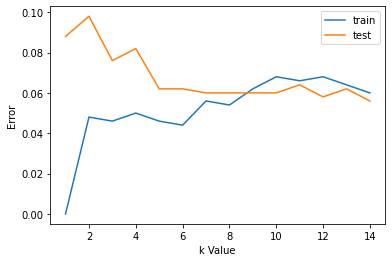

In [15]:
error2,error1=[], []
kk= range(1,15)
for k in kk:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))


optimal_k = kk[error1.index(min(error1))]
print("The optimal number of neighbors from training set  is {}".format(optimal_k))
optimal_k1 = kk[error2.index(min(error2))]
print("The optimal number of neighbors from test set  is {}".format(optimal_k1))
plt.figure()
plt.plot(kk, error1, label="train")
plt.plot(kk, error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [16]:
knn14 = KNeighborsClassifier(n_neighbors=14)
knn14.fit(X_train,y_train)
pred14 = knn14.predict(X_test)

print("the algorithm accuracy is " ,100*accuracy_score(y_test,pred14), "%")
print("the algorithm f1_score is " ,f1_score(y_test,pred14))
print('misclassification:',np.mean(pred14 != y_test))

the algorithm accuracy is  94.39999999999999 %
the algorithm f1_score is  0.9433198380566802
misclassification: 0.056


* the algorithm accuracy is  94.39999999999999 %
* the algorithm f1_score is  0.9433198380566802
* misclassification: 0.056

The optimal number of neighbors from test set  is 22


Text(0, 0.5, 'Error Rate')

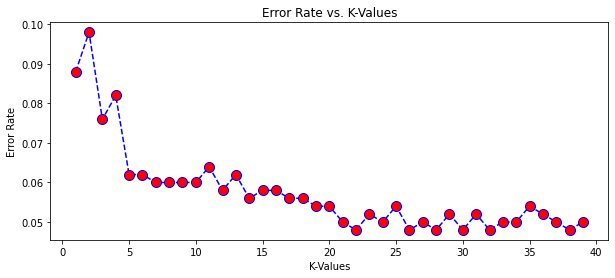

In [17]:
error_rate = []
ks=range(1,40)
for i in ks:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

optimal_k3 = ks[error_rate.index(min(error_rate))]
print("The optimal number of neighbors from test set  is {}".format(optimal_k3))

plt.figure(figsize=(10,4))
plt.plot(ks, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [18]:
knn22 = KNeighborsClassifier(n_neighbors=22)
knn22.fit(X_train,y_train)
pred22 = knn22.predict(X_test)

print("the algorithm accuracy is " ,100*accuracy_score(y_test,pred22), "%")
print("the algorithm f1_score is " ,f1_score(y_test,pred22))
print('misclassification:',np.mean(pred22 != y_test))

the algorithm accuracy is  95.19999999999999 %
the algorithm f1_score is  0.952
misclassification: 0.048


* the algorithm accuracy is  95.19999999999999 %
* the algorithm f1_score is  0.952
* misclassification: 0.048

The optimal number of neighbors from test set  is 88


Text(0, 0.5, 'Error Rate')

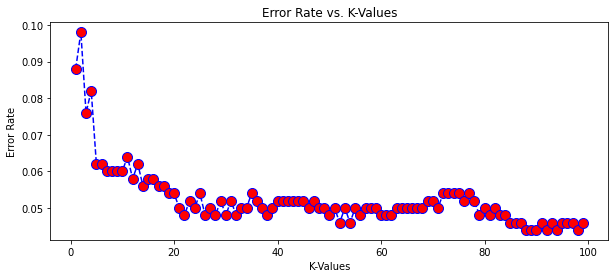

In [19]:
error_rate = []
ks=range(1,100)
for i in ks:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

optimal_k3 = ks[error_rate.index(min(error_rate))]
print("The optimal number of neighbors from test set  is {}".format(optimal_k3))

plt.figure(figsize=(10,4))
plt.plot(ks, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [20]:
knn88 = KNeighborsClassifier(n_neighbors=88)
knn88.fit(X_train,y_train)
pred88 = knn88.predict(X_test)

print("the algorithm accuracy is " ,100*accuracy_score(y_test,pred88), "%")
print("the algorithm f1_score is " ,f1_score(y_test,pred88))
print('misclassification:',np.mean(pred88 != y_test))

the algorithm accuracy is  95.6 %
the algorithm f1_score is  0.9565217391304348
misclassification: 0.044


* the algorithm accuracy is  95.6 %
* the algorithm f1_score is  0.9565217391304348
* misclassification: 0.044